In [1]:
%matplotlib inline


Partial dependency plots
==========================

Partial dependency plots consists in evaluating the model prediction
while varying one of more features and marginalizing (averaging) out the
effect of the other features.

They can be computed by varying only one feature, or more



In [2]:
# Load and prepare the data
from sklearn import datasets
boston = datasets.load_boston()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.2,
                                                    random_state=1)

Train a GBRT



In [3]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

All-in-one plotting function
-----------------------------



In [8]:
from sklearn.inspection.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt

Inspect feature 0, 3, 5, 6, and the interaction between 5 and 0, and 5
and 3



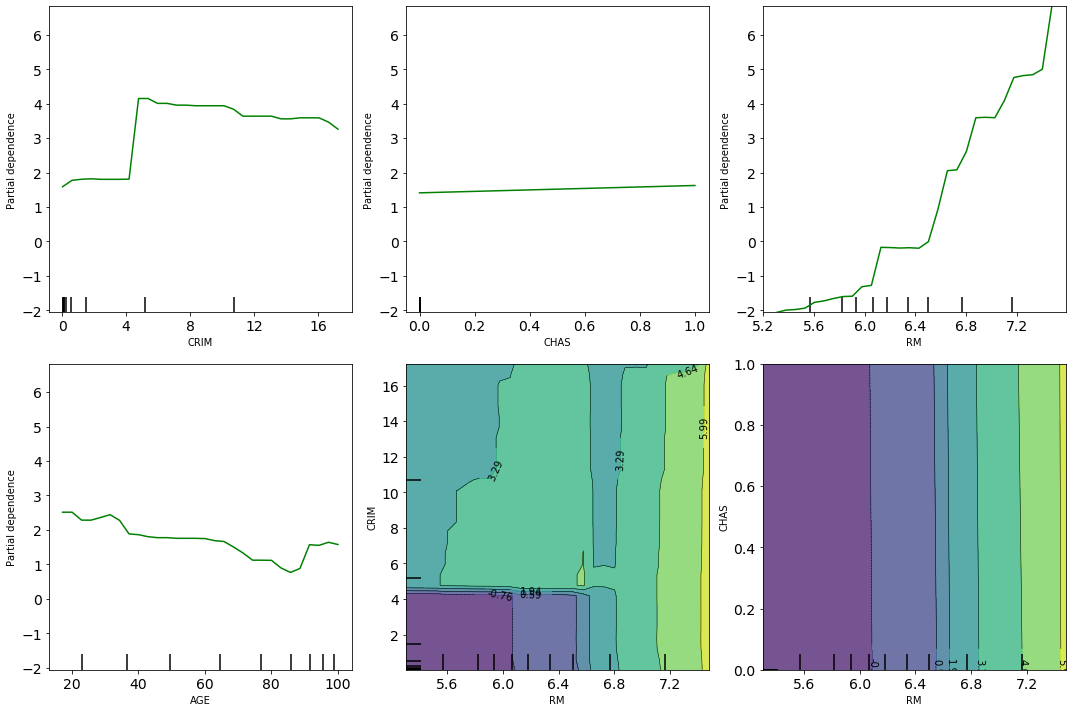

In [12]:
target_features = [0, 3, 5, 6, (5, 0), (5, 3)]
fig = plt.figure(figsize=(15, 10))
plot_partial_dependence(clf, X_train, target_features,
                        feature_names=boston.feature_names,
                        grid_resolution=30, fig=fig)
plt.tight_layout()

Lower-level partial_dependence function
----------------------------------------



In [15]:
target_feature = (5, 0)
from sklearn.inspection.partial_dependence import partial_dependence
partial_deps, grid = partial_dependence(clf, X=X_train, features=target_feature,
                                        grid_resolution=50)
import numpy as np
# The 2D coordinate grid (for plotting)
XX, YY = np.meshgrid(grid[0], grid[1])

# Reshape the partial deps on the grid
Z = partial_deps[0].reshape(list(map(np.size, grid))).T

3D plotting



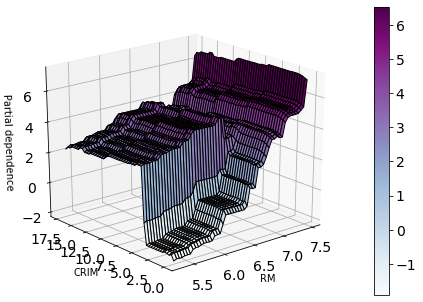

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                        cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(boston.feature_names[target_feature[0]])
ax.set_ylabel(boston.feature_names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=230)
plt.colorbar(surf)